<a href="https://colab.research.google.com/github/duwain/Prediction-of-Product-Sales/blob/main/Project1_Part1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

* Author: Duwain Hofmeester

## Project Overview



## Load and Inspect Data

In [58]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)



Mounted at /content/drive


In [59]:
# Import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Save the filepath and load the data as "df_titanic"
fpath= "/content/drive/MyDrive/Course 1/week 2/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [60]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Scan the .info() to answer the following questions about the data:**

>Add your answers in this Markdown cell, right below each question:

**Q: A1) How many rows are there?**
- Your Answer:
  - `8523`

**Q: A2) How many columns are there?**
- Your Answer:
  - `12`


## Clean Data

In [62]:
duplicated_rows =df.duplicated()
print(f'There are {duplicated_rows.sum()} duplicate rows.')

There are 0 duplicate rows.


In [63]:
null_value = df.isna().sum()
print(null_value)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [64]:
categorical_placeholder = 'MISSING'

In [65]:
obj_col= list(df.describe(include = 'object'))
print(obj_col)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [66]:
for i in obj_col:
  df[i].fillna(value = categorical_placeholder, inplace = True)

In [67]:
num_col= list(df.describe(exclude = 'object'))
print(num_col)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [68]:
Num_placeholder =-1
for i in num_col:
  df[i].fillna(value = Num_placeholder, inplace = True)

In [69]:
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [70]:
obj_col_1= df.describe(include = 'object')
for i in obj_col_1:
  print(df[i].value_counts())
  print('\n')

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Mediu

In [71]:
df.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)
df.replace({'Grocery Store': 'Supermarket Type4'}, inplace = True)

In [72]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [73]:
state = df.describe()
state.loc[['mean', 'min', 'max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

<Axes: ylabel='Count'>

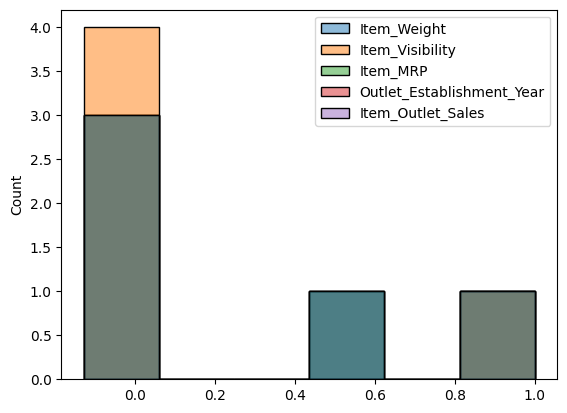

In [74]:
num = df.corr(numeric_only= True)
#for i in num:
#fig, ax= plt.subplots(figsize=(20,20))
sns.histplot(num)

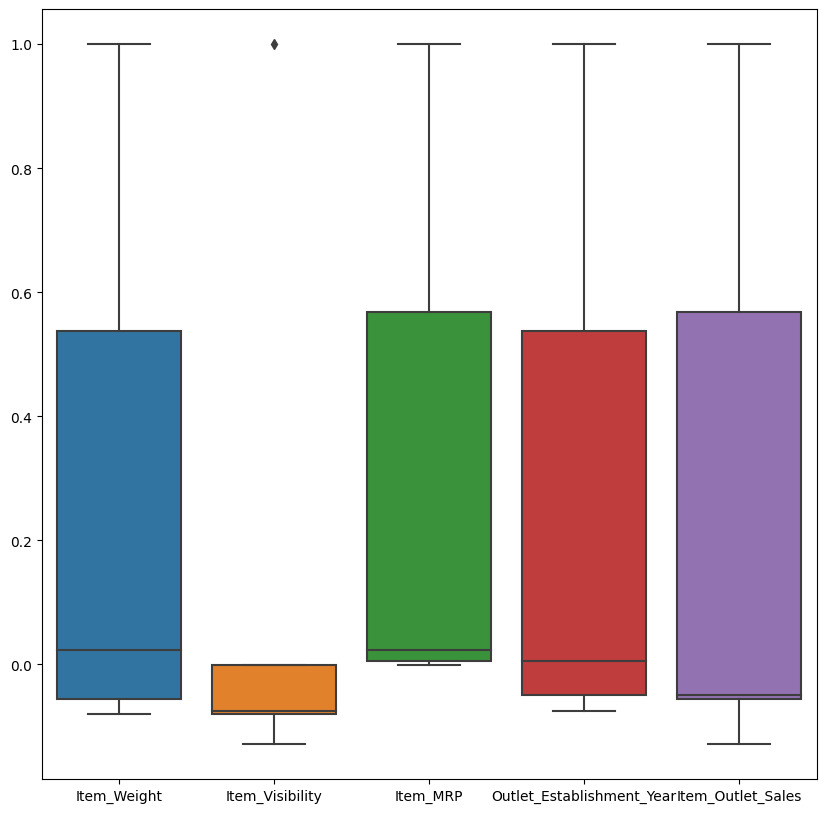

In [75]:
fig, ax= plt.subplots(figsize=(10,10))
ax = sns.boxplot(num, ax = ax)

<ipython-input-76-1d763bfdcb3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


<Axes: >

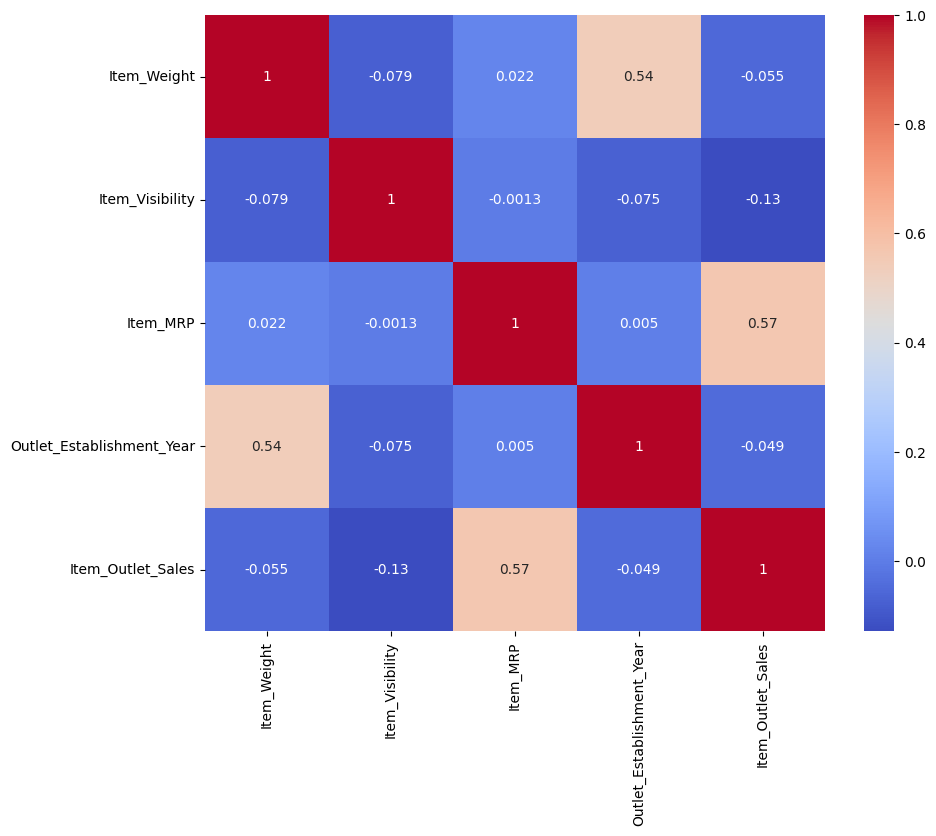

In [76]:
corr= df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

## Feature Inspection